In [1]:
import cc.atlas as atlas
import cc.cartography as cartography

In [2]:
import matplotlib
import matplotlib.pyplot as plt
matplotlib.style.use( '~/repos/clean-bold/clean-bold.mplstyle' )

# Load Data

In [3]:
fp = '../data/realistic_atlas/projection_for_testing.h5'
c = cartography.Cartographer.from_hdf5( fp )
map_fp = '../data/realistic_atlas/map.h5'

/Users/zhafen/repos/verdict/verdict.py:1404: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  if hasattr( a[first_element_index][0], 'decode' ):


In [28]:
central_publication = 'Hafen2019'

In [5]:
import numpy as np
central_publication = np.random.choice( c.publications )

# Plot Map

In [37]:
data = c.map(
    central_publication,
    save_filepath = map_fp,
#     overwrite = True,
#     max_links = 6,
#     max_searched = 10,
)

/Users/zhafen/repos/cc/cc/cartography.py:1246: RuntimeWarning: invalid value encountered in arccos
  d_matrix = np.arccos( self.cospsi_matrix )


Sorting....


100%|██████████| 3877/3877 [00:00<00:00, 8476.39it/s] 


1%
10%
20%
30%
40%
50%
60%
70%
80%
90%
100%


In [36]:
central_publication = 'Yu2019'

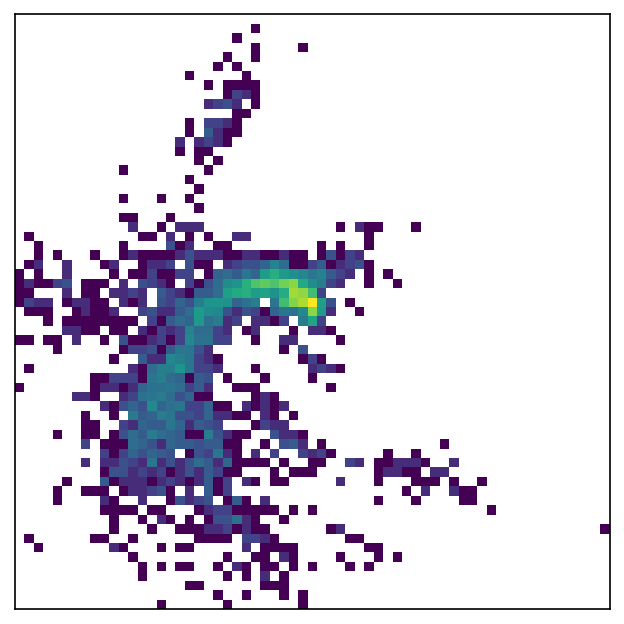

In [38]:
ax, (coords, inds, pairs) = c.plot_map(
    central_publication,
    data = data,
    scatter = False,
    scatter_kwargs = { 'alpha': 0.1 },
    histogram = True,
    range = [ -2.5, 2.5 ],
#     labels = True,
)

# hist, x_edges, y_edges, img = ax.hist2d(
#     coords[:,0],
#     coords[:,1],
#     bins = np.linspace( -1, 1, 128 ),
#     norm = matplotlib.colors.LogNorm(),
# )

# ax.set_xlim( -0.05, 0.05 )
# ax.set_ylim( -0.05, 0.05 )

# ax.get_figure()

In [8]:
import numpy as np

In [9]:
d_matrix = np.arccos( c.cospsi_matrix )
d_med = np.nanmedian( d_matrix )
d_std = np.nanstd( d_matrix )
d_matrix = np.exp( ( d_matrix - d_med ) / d_std )
n_p = len( c.publications )
d_matrix[np.arange(n_p),np.arange(n_p)] = 0.

<ipython-input-9-844b63abea0b>:1: RuntimeWarning: invalid value encountered in arccos
  d_matrix = np.arccos( c.cospsi_matrix )


In [10]:
m = 2
i = inds[m]
i_center = inds[0]
c.publications[i], c.publications[i_center]

('2018GeoRL..45.1086K', '2020JCli...33.1209L')

In [11]:
import scipy.spatial.distance

In [12]:
plotted_distances = scipy.spatial.distance.cdist( coords, coords ).flatten()
actual_distances = d_matrix.flatten()

In [13]:
plotted_cospsi = np.cos( d_std * np.log( plotted_distances ) + d_med )
actual_cospsi = np.cos( d_std * np.log( actual_distances ) + d_med )

<ipython-input-13-2a3e930543c9>:1: RuntimeWarning: divide by zero encountered in log
  plotted_cospsi = np.cos( d_std * np.log( plotted_distances ) + d_med )
<ipython-input-13-2a3e930543c9>:1: RuntimeWarning: invalid value encountered in cos
  plotted_cospsi = np.cos( d_std * np.log( plotted_distances ) + d_med )
<ipython-input-13-2a3e930543c9>:2: RuntimeWarning: divide by zero encountered in log
  actual_cospsi = np.cos( d_std * np.log( actual_distances ) + d_med )
<ipython-input-13-2a3e930543c9>:2: RuntimeWarning: invalid value encountered in cos
  actual_cospsi = np.cos( d_std * np.log( actual_distances ) + d_med )


In [14]:
import scipy.stats

In [15]:
valid = np.invert( np.isnan( actual_cospsi ) | np.isnan( plotted_cospsi ) )
valid_inds = np.arange( actual_cospsi.size )[valid]

In [20]:
bins = np.linspace( 0, np.nanpercentile( actual_distances, 99 ), 128 )
median = scipy.stats.binned_statistic(
    actual_distances[valid_inds],
    plotted_distances[valid_inds],
    statistic = 'median',
    bins = bins,
)
low = scipy.stats.binned_statistic(
    actual_distances[valid_inds],
    plotted_distances[valid_inds],
    statistic = lambda x: np.percentile( x, 16. ),
    bins = bins,
)
high = scipy.stats.binned_statistic(
    actual_distances[valid_inds],
    plotted_distances[valid_inds],
    statistic = lambda x: np.percentile( x, 84. ),
    bins = bins,
)

In [21]:
centers = 0.5 * ( bins[:-1] + bins[1:] )

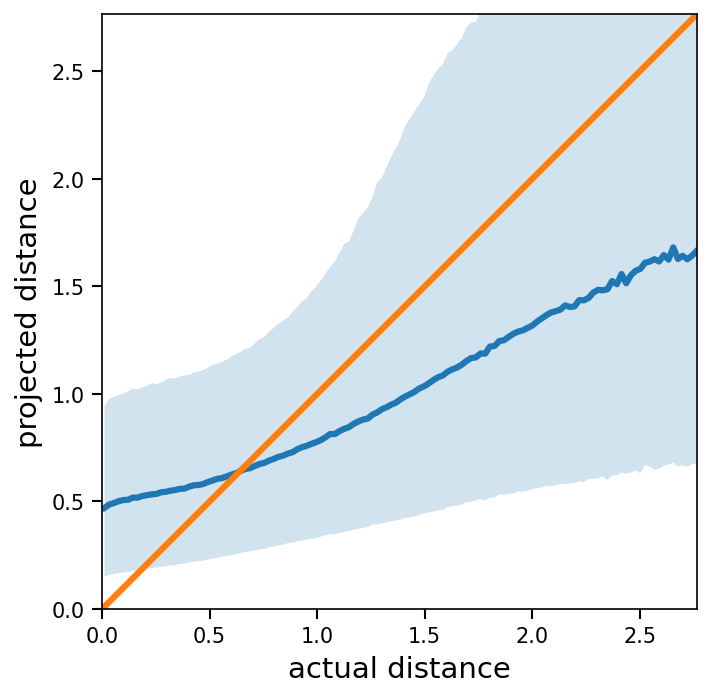

In [24]:
fig = plt.figure()
ax = plt.gca()

# ax.hist2d(
#     actual_distances,
#     plotted_distances,
#     bins = np.linspace( 0, 6, 128 ),
#     norm = matplotlib.colors.LogNorm(),
# )

# ax.hist2d(
#     actual_cospsi,
#     plotted_cospsi,
#     bins = np.linspace( 0., 1., 128 ),
#     norm = matplotlib.colors.LogNorm(),
# )

ax.plot(
    centers,
    median.statistic,
)

ax.fill_between(
    centers,
    low.statistic,
    high.statistic,
    alpha = 0.2,
)

ax.plot(
    [ 0, centers[-1] ],
    [ 0, centers[-1] ],
)

ax.set_xlabel( 'actual distance', fontsize=14 )
ax.set_ylabel( 'projected distance', fontsize=14 )


ax.set_xlim( 0, centers[-1] )
ax.set_ylim( 0, centers[-1] )

ax.set_aspect( 'equal' )

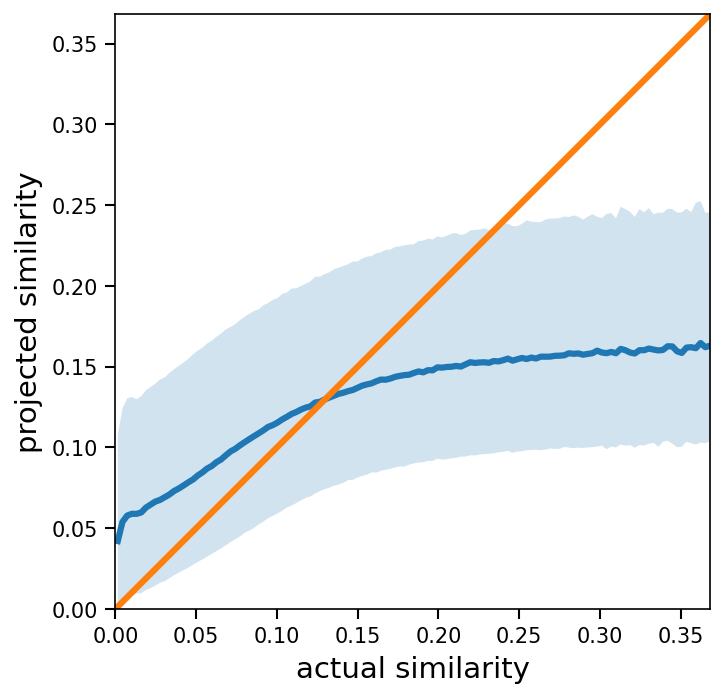

In [27]:
fig = plt.figure()
ax = plt.gca()

# ax.hist2d(
#     actual_distances,
#     plotted_distances,
#     bins = np.linspace( 0, 6, 128 ),
#     norm = matplotlib.colors.LogNorm(),
# )

# ax.hist2d(
#     actual_cospsi,
#     plotted_cospsi,
#     bins = np.linspace( 0., 1., 128 ),
#     norm = matplotlib.colors.LogNorm(),
# )

ax.plot(
    centers,
    median.statistic,
)

ax.fill_between(
    centers,
    low.statistic,
    high.statistic,
    alpha = 0.2,
)

ax.plot(
    [ 0, 1 ],
    [ 0, 1 ],
)

ax.set_xlabel( 'actual similarity', fontsize=14 )
ax.set_ylabel( 'projected similarity', fontsize=14 )


ax.set_xlim( 0, centers[-1] )
ax.set_ylim( 0, centers[-1] )

ax.set_aspect( 'equal' )

# DEBUG

In [18]:
import numpy as np

In [19]:
d_matrix = np.arccos( c.cospsi_matrix )
d_med = np.nanmedian( d_matrix )
d_std = np.nanstd( d_matrix )
d_matrix = np.exp( ( d_matrix - d_med ) / d_std )
n_p = len( c.publications )
d_matrix[np.arange(n_p),np.arange(n_p)] = 0.

<ipython-input-19-844b63abea0b>:1: RuntimeWarning: invalid value encountered in arccos
  d_matrix = np.arccos( c.cospsi_matrix )


In [28]:
m = 2
i = inds[m]
i_center = inds[0]
c.publications[i], c.publications[i_center]

('Hafen2020', 'Hafen2019')

In [35]:
inds[2]

858

In [34]:
d_matrix[i_center,i]

0.0009928405532651252

In [29]:
nan_inds = np.arange( n_p )[np.isnan( coords[:,0] )]

In [30]:
coords[inds[2]]

array([nan, nan])

In [31]:
np.isnan( coords[:,0] )[inds]

array([False, False,  True, ...,  True,  True,  True])

In [32]:
nan_inds[inds]

IndexError: index 3770 is out of bounds for axis 0 with size 3502

# Profile

In [4]:
import cProfile
import line_profiler

In [5]:
lp = line_profiler.LineProfiler()

In [6]:
lp.add_function( c.map )

In [7]:
lp.add_function( cartography.generate_map )

In [5]:
lp.run(
    '''c.map( 'Hafen2019', save_filepath=map_fp, overwrite=True, )'''
)

NameError: name 'lp' is not defined

In [9]:
lp.print_stats()

Timer unit: 1e-06 s

Total time: 2069.18 s
File: /Users/zhafen/repos/cc/cc/cartography.py
Function: map at line 1172

Line #      Hits         Time  Per Hit   % Time  Line Contents
  1172                                               def map(
  1173                                                   self,
  1174                                                   center,
  1175                                                   distance_transformation = 'exponential',
  1176                                                   max_links = None,
  1177                                                   max_searched = None,
  1178                                                   save_filepath = None,
  1179                                                   overwrite = False,
  1180                                                   use_numba = True,
  1181                                               ):
  1182                                                   '''Generate a map of the publicatio